In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import os

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data
df = pd.read_csv("../data/IMDB_Dataset.csv")

# Clean function
def clean_text(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch.isalnum() or ch.isspace())
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Save cleaned dataset
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/cleaned_reviews.csv", index=False)
print("Cleaned dataset saved to data/processed/cleaned_reviews.csv")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shruti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


✅ Cleaned dataset saved to data/processed/cleaned_reviews.csv


✅ Accuracy: 0.8891
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



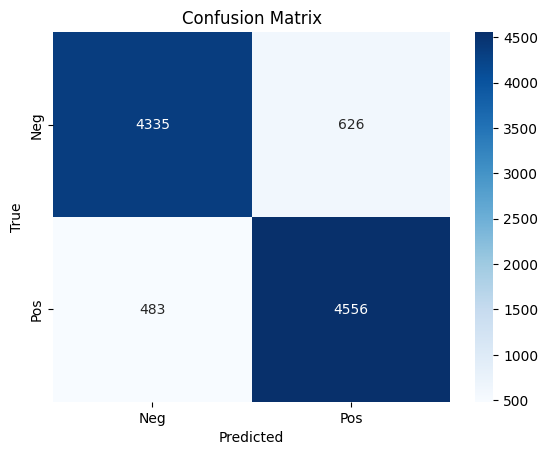

✅ Model and vectorizer saved to ../models/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

# Load cleaned data
df = pd.read_csv("../data/processed/cleaned_reviews.csv")

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.2, random_state=42
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Save model + vectorizer
os.makedirs("../models", exist_ok=True)
with open("../models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)
with open("../models/logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model and vectorizer saved to ../models/")


In [3]:
import pickle
import nltk
from nltk.corpus import stopwords
import ipywidgets as widgets
from IPython.display import display

# Load model and vectorizer
with open("../models/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)
with open("../models/logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

# Text cleaner
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch.isalnum() or ch.isspace())
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Prediction
def predict_sentiment(review):
    review_clean = clean_text(review)
    review_tfidf = tfidf.transform([review_clean])
    pred = model.predict(review_tfidf)[0]
    return "😊 Positive" if pred == 1 else "☹️ Negative"

# Interactive UI
text_input = widgets.Textarea(
    value='',
    placeholder='Type a movie review...',
    description='Review:',
    layout=widgets.Layout(width='80%', height='100px')
)
output = widgets.Output()

def on_submit(change):
    with output:
        output.clear_output()
        sentiment = predict_sentiment(change['new'])
        print("Predicted Sentiment:", sentiment)

text_input.observe(on_submit, names='value')
display(text_input, output)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shruti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Textarea(value='', description='Review:', layout=Layout(height='100px', width='80%'), placeholder='Type a movi…

Output()